In [1]:
# import libraries
import os
import sys

import pandas as pd
import numpy as np
import sqlite3
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import random
import time
from PIL import Image
# !pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import ast
import re

In [2]:
# Plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
# connect to music sqlite3 database 
conn = sqlite3.connect('music.db')
c = conn.cursor()

In [30]:
tracks = pd.read_sql("SELECT * FROM track", conn)
af = pd.read_sql("SELECT * FROM audio_features", conn)
artists = pd.read_sql("SELECT * FROM artist", conn)
lyrics = pd.read_sql("SELECT * FROM lyrics", conn)
bb100 = pd.read_sql("SELECT * FROM bb100", conn)

In [31]:
tracks.columns, af.columns, artists.columns, lyrics.columns, bb100.columns

(Index(['album_name', 'album_id', 'artist_name', 'artist_id', 'disc_number',
        'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'name',
        'popularity', 'track_number', 'type', 'uri'],
       dtype='object'),
 Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
        'time_signature'],
       dtype='object'),
 Index(['external_urls', 'followers', 'genre', 'href', 'id', 'name',
        'popularity', 'type'],
       dtype='object'),
 Index(['song_name', 'text', 'song_name_orig', 'spotify_id'], dtype='object'),
 Index(['Song', 'Artist', 'Rank_Default', 'Rank_LastWeek', 'Rank_Peak',
        'Num_Weeks_on_Chart', 'Curr_Week'],
       dtype='object'))

In [32]:
temp = pd.merge(tracks, af, left_on='id', right_on='id', how='inner')
print(temp.shape)

(145, 32)


In [33]:
temp.head()

,album_name,album_id,artist_name,artist_id,disc_number,duration_ms_x,explicit,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"10,000 Hours (with Justin Bieber)",4ow6xJwn49gpWz7iHpOzWY,Dan + Shay,7z5WFjZAIYejWy0NI5lv4T,1,167693.0,0,https://open.spotify.com/track/2wrJq5XKLnmhRXH...,https://api.spotify.com/v1/tracks/2wrJq5XKLnmh...,2wrJq5XKLnmhRXHIAf9xBa,...,0.000000,0.111,0.430,89.991,audio_features,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,https://api.spotify.com/v1/tracks/2wrJq5XKLnmh...,https://api.spotify.com/v1/audio-analysis/2wrJ...,167693.0,4
1,Adore You,5SL9nXZYZZl68bHwaM8uLa,Harry Styles,6KImCVD70vtIoJWnq6nGn3,1,207133.0,0,https://open.spotify.com/track/1M4qEo4HE3PRaCO...,https://api.spotify.com/v1/tracks/1M4qEo4HE3PR...,1M4qEo4HE3PRaCOM7EXNJq,...,0.000007,0.102,0.569,99.048,audio_features,spotify:track:1M4qEo4HE3PRaCOM7EXNJq,https://api.spotify.com/v1/tracks/1M4qEo4HE3PR...,https://api.spotify.com/v1/audio-analysis/1M4q...,207133.0,4
2,After A Few,5Z6UUS0n3Oz7i2bDLEdbWL,Travis Denning,6CegFHnUqJcOBipgphZ2CJ,1,213493.0,0,https://open.spotify.com/track/1z6wl2rwKatfmza...,https://api.spotify.com/v1/tracks/1z6wl2rwKatf...,1z6wl2rwKatfmza6usanWw,...,0.000000,0.194,0.695,106.998,audio_features,spotify:track:1z6wl2rwKatfmza6usanWw,https://api.spotify.com/v1/tracks/1z6wl2rwKatf...,https://api.spotify.com/v1/audio-analysis/1z6w...,213493.0,4
3,After Hours,4yP0hdKOZPNshxUOjY0cZj,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,1,361026.0,0,https://open.spotify.com/track/2p8IUWQDrpjuFlt...,https://api.spotify.com/v1/tracks/2p8IUWQDrpju...,2p8IUWQDrpjuFltbdgLOag,...,0.006040,0.121,0.143,108.959,audio_features,spotify:track:2p8IUWQDrpjuFltbdgLOag,https://api.spotify.com/v1/tracks/2p8IUWQDrpju...,https://api.spotify.com/v1/audio-analysis/2p8I...,361027.0,4
4,Heaven Or Hell,7z4GhRfLqfSkqrj5F3Yt2B,Don Toliver,4Gso3d4CscCijv0lmajZWs,1,167915.0,1,https://open.spotify.com/track/527k23H0A4Q0UJN...,https://api.spotify.com/v1/tracks/527k23H0A4Q0...,527k23H0A4Q0UJN3vGs0Da,...,0.328000,0.603,0.453,162.948,audio_features,spotify:track:527k23H0A4Q0UJN3vGs0Da,https://api.spotify.com/v1/tracks/527k23H0A4Q0...,https://api.spotify.com/v1/audio-analysis/527k...,167916.0,4


In [34]:
temp.drop(columns=['duration_ms_y', 'type_y', 'type_x', 'uri_y', 'uri_x'], inplace=True)
temp.rename(columns={'duration_ms_x':'duration_ms'}, inplace=True)

In [35]:
temp.columns

Index(['album_name', 'album_id', 'artist_name', 'artist_id', 'disc_number',
       'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'name',
       'popularity', 'track_number', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_href', 'analysis_url',
       'time_signature'],
      dtype='object')

In [9]:
# make histogram distribution subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Danceability", "Energy", "Loudness", "Valence"))
fig.add_trace(
    go.Histogram(x=temp['danceability'], nbinsx=40),
    row=1,
    col=1
)
fig.add_trace(
    go.Histogram(x=temp['energy'], nbinsx=40),
    row=1,
    col=2
)
fig.add_trace(
    go.Histogram(x=temp['loudness'], nbinsx=40),
    row=2,
    col=1
)
fig.add_trace(
    go.Histogram(x=temp['valence'], nbinsx=40),
    row=2,
    col=2
)


fig.update_layout(height=600, width=800, title_text="Distribution of Audio Features")
fig.show()

In [10]:
temp['mode'].value_counts()

1    75
0    70
Name: mode, dtype: int64

In [11]:
# mode distribution
major = temp[temp['mode'] == 1]['type_x'].value_counts()
minor = temp[temp['mode'] == 0]['type_x'].value_counts()

fig = go.Figure()

fig.add_trace(go.Histogram(y=major, name="Major", marker_color='#ffdd00'))

fig.add_trace(go.Histogram(y=minor, name="Minor", marker_color='#0022cf'))

fig.update_layout(
    barmode='stack', 
    height=300, 
    width=300, 
    title_text="Track Modality",
    font_family="Rockwell",
    legend={'traceorder':'normal'}
    )

fig.show()

In [66]:
# convert key integers to name for visualization purpoes
music_keys = {0: 'C',
              1: 'C#/Db',
              2: 'D',
              3: 'D#/Cb',
              4: 'E',
              5: 'F',
              6: 'F#/Gb',
              7: 'G',
              8: 'G#/Ab',
              9: 'A',
              10: 'A#/Bb',
              11: 'B'}

def convert_key(num):
    return music_keys[num]

temp['key_name'] = temp['key'].apply(convert_key)


In [67]:
# key and tempo

fig = px.bar(x = temp['key_name'].value_counts().index, y = temp['key_name'].value_counts())

fig.update_layout(
    title_text="Key Distributions",
    font_family="Rockwell",
    yaxis=dict(title='Count'),
    xaxis=dict(title='Musical Key')
    
)
fig.show()

In [14]:
# What makes a song popular? 
# scatterplots of popularity vs other features
temp1 = temp[['popularity', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence']]

fig = make_subplots(rows=2, cols=4, subplot_titles=('danceability',
       'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'))

fig.add_trace(
    go.Scatter(x=temp['danceability'], y=temp['popularity'], mode='markers'),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(x=temp['energy'], y=temp['popularity'], mode='markers'),
    row=1,
    col=2
)

fig.add_trace(
    go.Scatter(x=temp['loudness'], y=temp['popularity'], mode='markers'),
    row=1,
    col=3
)

fig.add_trace(
    go.Scatter(x=temp['speechiness'], y=temp['popularity'], mode='markers'),
    row=1,
    col=4
)

fig.add_trace(
    go.Scatter(x=temp['acousticness'], y=temp['popularity'], mode='markers'),
    row=2,
    col=1
)
fig.add_trace(
    go.Scatter(x=temp['speechiness'], y=temp['popularity'], mode='markers'),
    row=2,
    col=2
)

fig.add_trace(
    go.Scatter(x=temp['liveness'], y=temp['popularity'], mode='markers'),
    row=2,
    col=3
)

fig.add_trace(
    go.Scatter(x=temp['valence'], y=temp['popularity'], mode='markers'),
    row=2,
    col=4
)

fig.update_layout(
    title="Popularity vs Audio Features",
    yaxis=dict(title='Popularity'),
    showlegend=False
)
fig.show()


# Audio Features Heatmap

In [36]:
temp2 = temp[['popularity','duration_ms', 'time_signature', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]

# calculate af correations
corr2 = temp2.corr() 

In [37]:
fig = px.imshow(
    corr2,
    labels=dict(color="Correlation"),
    x=temp2.columns,
    y=temp2.columns,
    color_continuous_scale='plasma'
    )

fig.update_layout(
    title="Heatmap of Audio Features")

fig.show()

# Radar Chart for indivd song's Audio Features

In [38]:
# Test Radar Chart - chart for individ songs only
song1 = temp2[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].iloc[4]
TEST = pd.DataFrame(dict(
    r=song1.values,
    theta=list(song1.index)))
fig = px.line_polar(TEST, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

# Histograms for aggregate Audio Features and Popularity

In [12]:
# # stack or overlap two+ distribs
# fig = go.Figure()

# fig.add_trace(go.Histogram(x=temp1['danceability'], nbinsx=50))
# fig.add_trace(go.Histogram(x=temp2['energy'], nbinsx=50))
# # Overlay both histograms
# fig.update_layout(barmode='stack')   # change to either 'stack' or 'overlay'
# # Reduce opacity to see both histograms
# # fig.update_traces(opacity=0.75)
# fig.show()

In [39]:
# feature = 'danceability'
# title = f"Histogram of {feature}"
# fig = px.histogram(temp1, title=title, x=feature, nbins=30, histnorm='probability density')
# fig.show()


# Artist data visuaizations

In [41]:
# # artist counts (who has the most num of songs?)
# plt.figure(figsize=[8,6])
# ax = sns.countplot(x="artist_name", data=tracks, order=tracks['artist_name'].value_counts()[0:10].index)
# plt.xlabel('Artist Name')
# plt.title('Top 10 Artists')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# # plt.savefig("IMAGENAME.png", format="png")

In [125]:
x = temp['artist_name'].value_counts().iloc[0:10].index
y = temp['artist_name'].value_counts().iloc[0:10]
fig = px.bar(temp, x=x, y=y, color=x)
fig.update_layout(
    showlegend=False,
    title="Top 10 Artists on the Billboard 100 by Song Count",
    yaxis=dict(title='Count'),
    xaxis=dict(title='Artist')
)
fig.show()

## Genres Wordcloud
All artists combined

Text(0.5, 1.0, 'Top Genres')

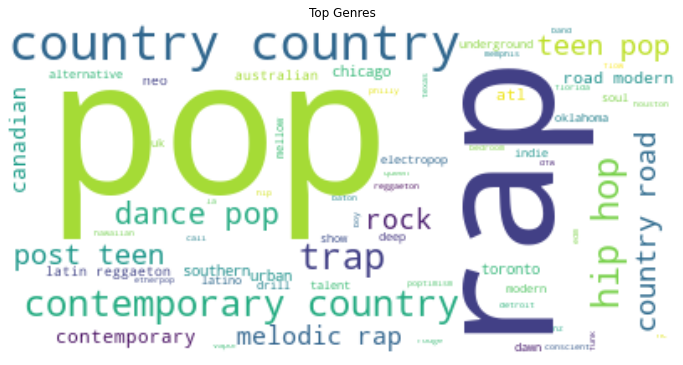

In [54]:
# list of strings
genre_list = [row for row in artists['genre'].str.strip(to_strip=".!? \n\t\'")]  
genre_text = " ".join(str(l) for l in genre_list)
genre_text2 = re.sub('[^A-Za-z]+', ' ', genre_text).strip()

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(genre_text2)
plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top Genres')

## Lyrics Wordcloud
### All songs combined

In [55]:
# list of strings
lyric_list = [row for row in lyrics['text'].str.strip(to_strip=".!? \n\t\'")]  

In [56]:
lyric_text = " ".join(str(l) for l in lyric_list)
lyric_text2 = re.sub('[^A-Za-z]+', ' ', lyric_text).strip()

Text(0.5, 1.0, 'Top Words in Lyrics')

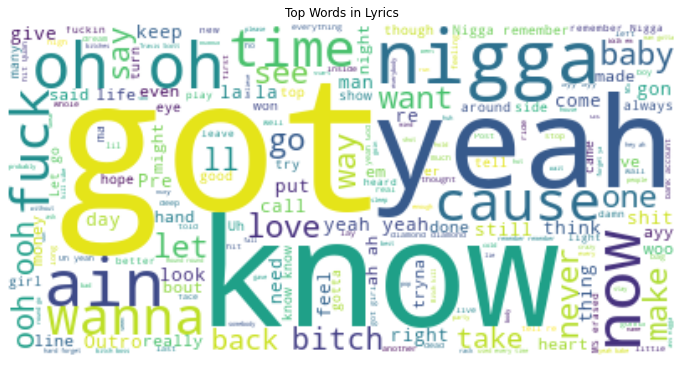

In [57]:
# Lyric wordcloud with updated/custom stopwords
sw2 = set(STOPWORDS)
sw2.update(['intro', 'verse', 'chorus', 'bridge', 'don'])

wordcloud2 = WordCloud(stopwords=sw2, background_color="white").generate(lyric_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Top Words in Lyrics')


# Bar Charts

In [58]:
top15 = artists.sort_values(by='followers', ascending=False).iloc[0:15]



In [200]:
# bar chart number followers top 15 artists
fig = px.bar(x=top15['name'], y=top15['followers'], color=top15['name'])
fig.update_layout(
    title_text="Top 15 Artists by Number of Spotify Followers",
    showlegend=False,
    yaxis=dict(title='Follower Count'),
    xaxis=dict(title='Artist')
    )

fig.show()

In [73]:
# How many unique artists?
print("Number of unique artists:", temp['artist_name'].nunique(), "\n")
# Top 15 artists song counts
print(temp['artist_name'].value_counts().iloc[0:15])

Number of unique artists: 94 

DaBaby                        12
Rod Wave                      10
Lil Baby                       6
YoungBoy Never Broke Again     5
The Weeknd                     4
Lil Uzi Vert                   4
Megan Thee Stallion            3
Kane Brown                     3
Jhené Aiko                     2
Bad Bunny                      2
Lewis Capaldi                  2
Future                         2
Thomas Rhett                   2
Morgan Wallen                  2
Doja Cat                       2
Name: artist_name, dtype: int64


# Time Series Analysis
### How do BB100 rankings change over time?

In [193]:
to_graph = bb100.sort_values(by='Num_Weeks_on_Chart', ascending=False).iloc[0:45]

In [194]:
N = to_graph['Song'].nunique()

In [195]:
fig = px.line(to_graph, x='Curr_Week', y='Rank_Default', color='Song', line_shape='spline')
fig.update_layout(
    title_text=f"Billboard Rankings for Current Top {N} Songs",
    yaxis=dict(title='Ranking'),
    xaxis=dict(title='Week')
    )
fig.show()